# Simultaneous deformation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sg2lib import *

## Naive concept of simultaneous deformation

Here we try to split simple shear and pure shear to several incremental steps and mutually superposed those increments to simulate simultaneous deformation. We will use following deformation gradients for total simple shear and pure shear:

In [3]:
gamma = 1
Sx = 2
Fs = array([[1, gamma], [0, 1]])
Fp = array([[Sx, 0], [0, 1/Sx]])

To divide simple shear deformation with $\gamma$=1 to `n` incremental steps

In [4]:
n = 10
Fsi = array([[1, gamma/n], [0, 1]])
print('Incremental deformation gradient:')
print(Fsi)

Incremental deformation gradient:
[[1.  0.1]
 [0.  1. ]]


To check that supperposition of those increments give as total deformation, we can use `allclose` numpy function

In [5]:
array_equal(matrix_power(Fsi, n), Fs)

True

In [6]:
Fpi = array([[Sx**(1/n), 0], [0, Sx**(-1/n)]])
print('Incremental deformation gradient:')
print(Fpi)

Incremental deformation gradient:
[[1.07177346 0.        ]
 [0.         0.93303299]]


In [7]:
allclose(matrix_power(Fpi, n), Fp)

True

Knowing that deformation superposition is not cimmutative, we can check that axial ratio of finite strain resulting from simple shear superposed on pure shear and vice-versa is really different:

In [8]:
u,s,v = svd(Fs @ Fp)
print('Axial ratio of finite strain resulting from simple shear superposed on pure shear: {}'.format(s[0]/s[1]))
u,s,v = svd(Fp @ Fs)
print('Axial ratio of finite strain resulting from pure shear superposed on simple shear: {}'.format(s[0]/s[1]))

Axial ratio of finite strain resulting from simple shear superposed on pure shear: 4.265564437074638
Axial ratio of finite strain resulting from pure shear superposed on simple shear: 8.12695264839553


Lets try to split those deformation to two increments and mutually mix them:

In [9]:
Fsi = array([[1, gamma/2], [0, 1]])
Fpi = array([[Sx**(1/2), 0], [0, Sx**(-1/2)]])
u,s,v = svd(Fsi @ Fpi @ Fsi @ Fpi)
print('Axial ratio of finite strain of superposed increments starting with pure shear: {}'.format(s[0]/s[1]))
u,s,v = svd(Fpi @ Fsi @ Fpi @ Fsi)
print('Axial ratio of finite strain of superposed increments starting with simple shear: {}'.format(s[0]/s[1]))

Axial ratio of finite strain of superposed increments starting with pure shear: 4.59486578686164
Axial ratio of finite strain of superposed increments starting with simple shear: 6.342329219213246


It is now close to each other, but still quite different. So let's split it to much more increments....

In [10]:
n = 100
Fsi = array([[1, gamma/n], [0, 1]])
Fpi = array([[Sx**(1/n), 0], [0, Sx**(-1/n)]])
u,s,v = svd(matrix_power(Fsi @ Fpi, n))
print('Axial ratio of finite strain of superposed increments starting with pure shear: {}'.format(s[0]/s[1]))
u,s,v = svd(matrix_power(Fpi @ Fsi, n))
print('Axial ratio of finite strain of superposed increments starting with simple shear: {}'.format(s[0]/s[1]))

Axial ratio of finite strain of superposed increments starting with pure shear: 5.212797654655028
Axial ratio of finite strain of superposed increments starting with simple shear: 5.246490787118572


Now it is very close. Let's visualize how finite strain converge with increasing number of increments:

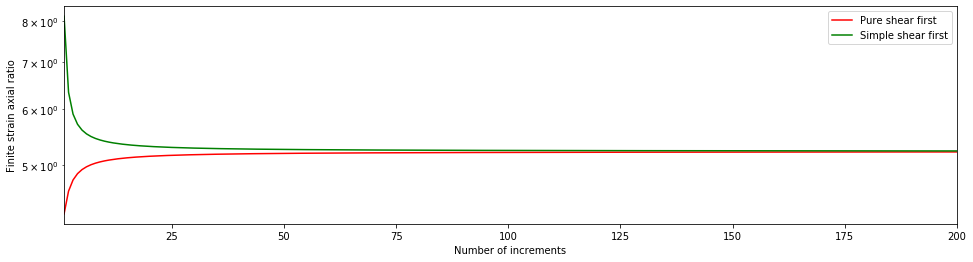

In [11]:
arp = []
ars = []
ninc = range(1, 201)
for n in ninc:
    Fsi = array([[1, gamma/n], [0, 1]])
    Fpi = array([[Sx**(1/n), 0], [0, Sx**(-1/n)]])
    u,s,v = svd(matrix_power(Fsi @ Fpi, n))
    arp.append(s[0]/s[1])
    u,s,v = svd(matrix_power(Fpi @ Fsi, n))
    ars.append(s[0]/s[1])
figure(figsize=(16, 4))
semilogy(ninc, arp, 'r', label='Pure shear first')
semilogy(ninc, ars, 'g', label='Simple shear first')
legend()
xlim(1, 200)
xlabel('Number of increments')
ylabel('Finite strain axial ratio');

## Using spatial velocity gradient

We need to import matrix exponential and matrix logarithm functions from `scipy.linalg`

In [12]:
from scipy.linalg import expm, logm

Spatial velocity gradient could be obtained as matrix logarithm of deformation gradient

In [13]:
Lp = logm(Fp)
Ls = logm(Fs)

Total spatial velocity gradient of simulatanous deformation could be calculated by summation of individual ones

In [14]:
L = Lp + Ls

Resulting deformation gradient could be calculated as matrix exponential of total spatial velocity gradient

In [15]:
F = expm(L)
u,s,v = svd(F)
sar = s[0]/s[1]
print('Axial| ratio of finite strain of simultaneous pure shear and simple shear: {}'.format(sar))

Axial| ratio of finite strain of simultaneous pure shear and simple shear: 5.229548972272846


Lets overlay it on previous diagram

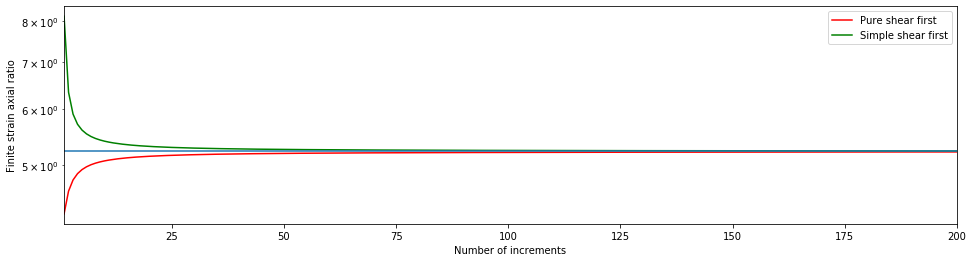

In [16]:
arp = []
ars = []
ninc = range(1, 201)
for n in ninc:
    Fsi = array([[1, gamma/n], [0, 1]])
    Fpi = array([[Sx**(1/n), 0], [0, Sx**(-1/n)]])
    u,s,v = svd(matrix_power(Fsi @ Fpi, n))
    arp.append(s[0]/s[1])
    u,s,v = svd(matrix_power(Fpi @ Fsi, n))
    ars.append(s[0]/s[1])
figure(figsize=(16, 4))
semilogy(ninc, arp, 'r', label='Pure shear first')
semilogy(ninc, ars, 'g', label='Simple shear first')
legend()
xlim(1, 200)
axhline(sar)
xlabel('Number of increments')
ylabel('Finite strain axial ratio');

## Decomposition of spatial velocity gradient

Here we will decompose spatial velocity gradient of simple shear to rate of deformation tensor and spin tensor.

In [17]:
L = logm(Fs)

In [18]:
D = (L + L.T)/2
W = (L - L.T)/2

Check that decomposition give total spatial velocity gradient

In [19]:
allclose(D + W, L)

True

Visualize spatial velocity gradients for rate of deformation tensor

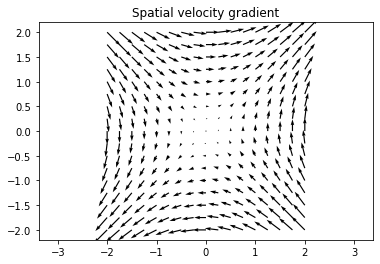

In [20]:
vel_field(D)

Visualize spatial velocity gradients for spin tensor

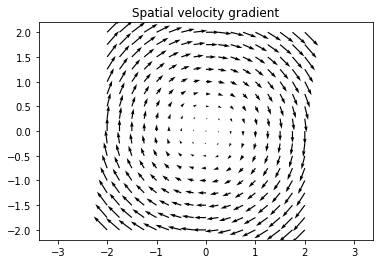

In [21]:
vel_field(W)